In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\Lenovo\Downloads\resume_job_matching_dataset.csv")
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_description  10000 non-null  object
 1   resume           10000 non-null  object
 2   match_score      10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB
None


In [3]:
print(df.columns)
print(df.head())
print(df.tail())

Index(['job_description', 'resume', 'match_score'], dtype='object')
                                     job_description  \
0  Data Analyst needed with experience in SQL, Ex...   
1  Data Scientist needed with experience in Stati...   
2  Software Engineer needed with experience in Sy...   
3  ML Engineer needed with experience in Python, ...   
4  Software Engineer needed with experience in RE...   

                                              resume  match_score  
0  Experienced professional skilled in SQL, Power...            4  
1  Experienced professional skilled in Python, De...            4  
2  Experienced professional skilled in wait, Git,...            5  
3  Experienced professional skilled in return, De...            4  
4  Experienced professional skilled in REST APIs,...            5  
                                        job_description  \
9995  Product Manager needed with experience in Scru...   
9996  Data Analyst needed with experience in Tableau...   
9997  Prod

In [4]:
print(df.size)

30000


In [5]:
# Check for missing values
df.isnull().sum()




job_description    0
resume             0
match_score        0
dtype: int64

In [6]:
import re
import pandas as pd

# Function to clean text
def clean_text(text):
    text = str(text).lower()                       # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)    # Remove punctuation/special characters
    text = re.sub(r'\s+', ' ', text).strip()      # Remove extra spaces
    return text

# Apply cleaning to both columns
df['resume_clean'] = df['resume'].apply(clean_text)
df['job_description_clean'] = df['job_description'].apply(clean_text)

# Quick check
print(df[['resume_clean','job_description_clean']].head())


                                        resume_clean  \
0  experienced professional skilled in sql power ...   
1  experienced professional skilled in python dee...   
2  experienced professional skilled in wait git s...   
3  experienced professional skilled in return dem...   
4  experienced professional skilled in rest apis ...   

                               job_description_clean  
0  data analyst needed with experience in sql exc...  
1  data scientist needed with experience in stati...  
2  software engineer needed with experience in sy...  
3  ml engineer needed with experience in python c...  
4  software engineer needed with experience in re...  


In [7]:
# Check unique values for all columns
for col in df.columns:
    unique_vals = df[col].unique()
    num_unique = len(unique_vals)
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique}")
    
    # Show unique values if there are fewer than 20 (otherwise just show first 20)
    if num_unique <= 20:
        print("Unique values:", unique_vals)
    else:
        print("First 20 unique values:", unique_vals[:20])
    print("-"*50)

# Optional: check for exact duplicates across all columns
duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicates}")


Column: job_description
Number of unique values: 10000
First 20 unique values: ['Data Analyst needed with experience in SQL, Excel, Power BI, Reporting, Data Cleaning, Tableau. Anything real big. Suggest edge happen available treat somebody.'
 'Data Scientist needed with experience in Statistics, Pandas, SQL, Machine Learning, NLP, Deep Learning, Python. Unit resource none quickly second interesting really end. Across price book similar song give. Black seem reach deep.'
 'Software Engineer needed with experience in System Design, Agile, Git, Docker, Java. Seat rather woman leg perform particularly. Life necessary place choice.'
 'ML Engineer needed with experience in Python, Computer Vision, Keras, MLOps, TensorFlow. Happen well risk billion. Film onto itself computer together clearly federal. Agreement expert central say force mean.'
 'Software Engineer needed with experience in REST APIs, Agile, Docker, System Design, Spring Boot, Git. Audience husband teacher finish clearly dark cr

In [8]:
print(df['match_score'].unique())


[4 5 2 3 1]


In [9]:
duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicates}")


Number of exact duplicate rows: 0


In [10]:
# 6. EDA on target variable
# -----------------------------
print(df['match_score'].value_counts())
print(df['match_score'].value_counts(normalize=True))

# Optional: binary target for descriptive plots
df['match_binary'] = df['match_score'].apply(lambda x: 1 if x>=4 else 0)
print(df['match_binary'].value_counts())

match_score
4    3029
5    2372
3    2269
2    1890
1     440
Name: count, dtype: int64
match_score
4    0.3029
5    0.2372
3    0.2269
2    0.1890
1    0.0440
Name: proportion, dtype: float64
match_binary
1    5401
0    4599
Name: count, dtype: int64


       resume_length    job_length
count   10000.000000  10000.000000
mean       24.641000     26.085200
std         5.376747      5.178419
min        10.000000     12.000000
25%        21.000000     22.000000
50%        25.000000     26.000000
75%        28.000000     30.000000
max        43.000000     43.000000


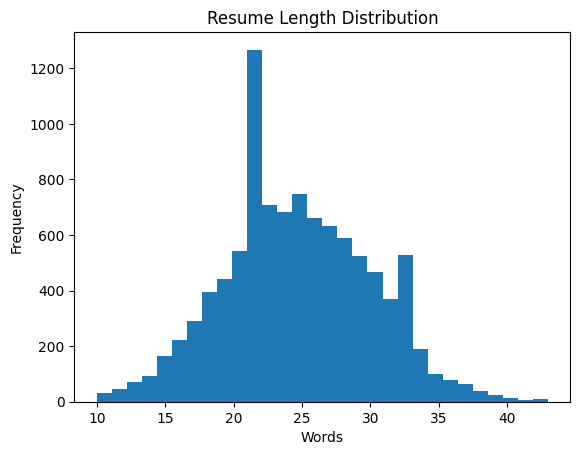

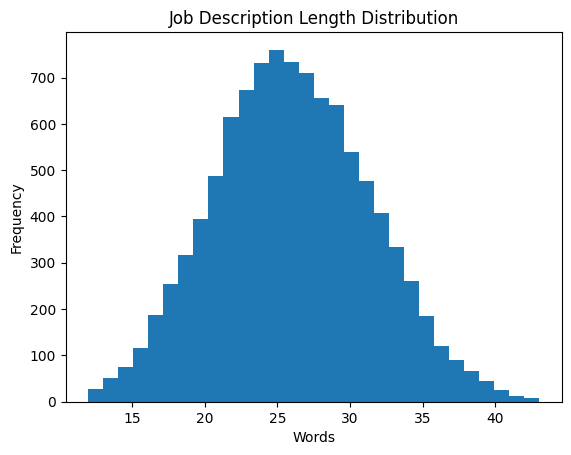

count    10000.000000
mean         5.080000
std          1.963157
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         12.000000
Name: keyword_overlap, dtype: float64


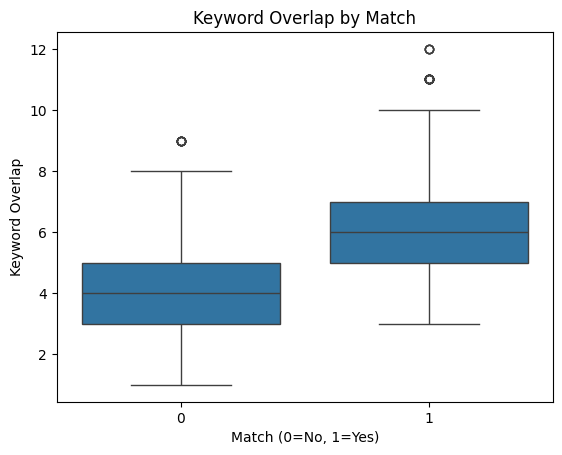

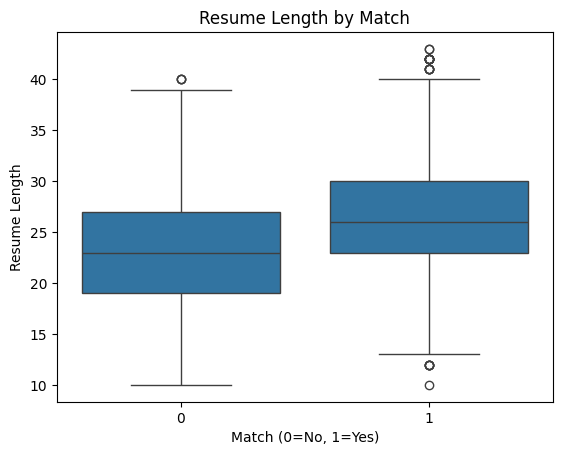

In [11]:
# -----------------------------
# 7. Basic text metrics
# -----------------------------
# Word counts
df['resume_length'] = df['resume_clean'].apply(lambda x: len(x.split()))
df['job_length'] = df['job_description_clean'].apply(lambda x: len(x.split()))

print(df[['resume_length','job_length']].describe())

# Histograms
plt.hist(df['resume_length'], bins=30)
plt.title("Resume Length Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

plt.hist(df['job_length'], bins=30)
plt.title("Job Description Length Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 8. Keyword overlap (descriptive)
# -----------------------------
def keyword_overlap(resume, job):
    resume_words = set(resume.split())
    job_words = set(job.split())
    return len(resume_words & job_words)

df['keyword_overlap'] = df.apply(lambda x: keyword_overlap(x['resume_clean'], x['job_description_clean']), axis=1)

print(df['keyword_overlap'].describe())

# Boxplot: keyword overlap vs match
sns.boxplot(x='match_binary', y='keyword_overlap', data=df)
plt.xlabel("Match (0=No, 1=Yes)")
plt.ylabel("Keyword Overlap")
plt.title("Keyword Overlap by Match")
plt.show()

# Boxplot: resume length vs match
sns.boxplot(x='match_binary', y='resume_length', data=df)
plt.xlabel("Match (0=No, 1=Yes)")
plt.ylabel("Resume Length")
plt.title("Resume Length by Match")
plt.show()

In [12]:
# Features
X = df[['resume_length', 'job_length', 'keyword_overlap']]

# Target
y = df['match_binary']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # predicted probabilities


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7935
Confusion Matrix:
 [[694 211]
 [202 893]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       905
           1       0.81      0.82      0.81      1095

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [17]:

 #Train-test split while keeping indices
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Create results DataFrame with original indices
results = pd.DataFrame({
    "actual_match": y_test,
    "predicted_match": y_pred,
    "predicted_prob": y_prob
}, index=y_test.index)

# Attach results back to the original rows
df_test = df.loc[y_test.index].copy()
df_test = pd.concat([df_test, results], axis=1)

# Save for Power BI
df_test.to_csv(r"C:\Users\Lenovo\Downloads\resume_job_with_predictions.csv", index=False)
print("✅ Dataset saved in Downloads folder")


✅ Dataset saved in Downloads folder


In [18]:
import os
os.getcwd()


'c:\\Users\\Lenovo\\Downloads'